<a href="https://colab.research.google.com/github/pranay-343/ML-CS6364-Final-Project/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

url = 'https://raw.githubusercontent.com/pranay-343/ML-CS6364-Final-Project/main/Dataset/USvideos.csv'
data = pd.read_csv(url)

In [ ]:
data.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
data.shape

(40949, 16)

In [ ]:
print(data.isnull().values.any())
data = data.dropna(how='any',axis=0)


True


In [ ]:
data.describe()

,category_id,views,likes,dislikes,comment_count
count,40379.000000,4.037900e+04,4.037900e+04,4.037900e+04,4.037900e+04
mean,19.944253,2.370839e+06,7.461677e+04,3.508122e+03,8.287396e+03
std,7.594850,7.428515e+06,2.296172e+05,2.317486e+04,3.431605e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.470760e+05,5.621500e+03,2.050000e+02,6.230000e+02
50%,24.000000,6.895970e+05,1.837100e+04,6.370000e+02,1.874000e+03
75%,25.000000,1.834912e+06,5.567200e+04,1.948000e+03,5.787000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06


In [ ]:
data.drop(['video_id','thumbnail_link'],axis=1,inplace=True)

In [ ]:
data.apply(lambda x: len(x.unique()))

trending_date               205
title                      6357
channel_title              2142
category_id                  16
publish_time               6172
tags                       6008
views                     39927
likes                     29664
dislikes                   8460
comment_count             13684
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

Data Visualisations

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


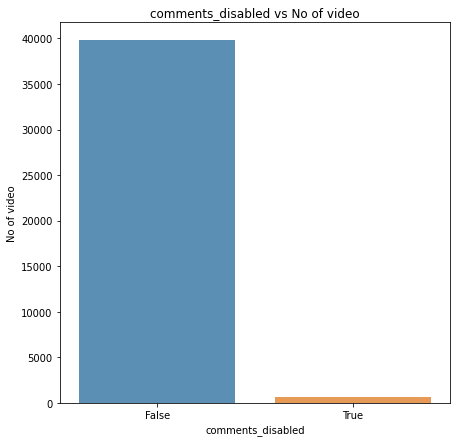

In [ ]:
count=data['comments_disabled'].value_counts()
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('{} vs No of video'.format('comments_disabled'))
plt.ylabel('No of video')
plt.xlabel('{}'.format('comments_disabled'))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


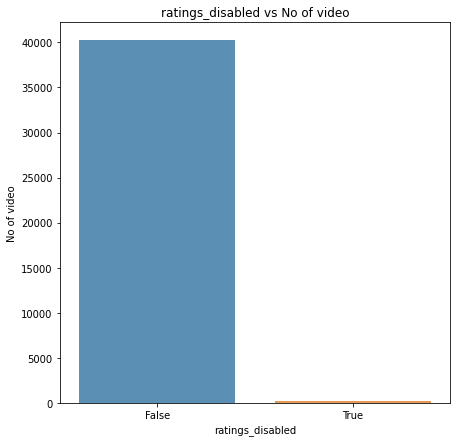

In [ ]:
count=data['ratings_disabled'].value_counts()
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('{} vs No of video'.format('ratings_disabled'))
plt.ylabel('No of video')
plt.xlabel('{}'.format('ratings_disabled'))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


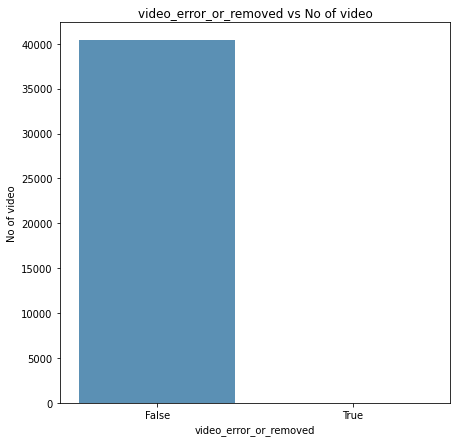

In [ ]:
count=data['video_error_or_removed'].value_counts()
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('{} vs No of video'.format('video_error_or_removed'))
plt.ylabel('No of video')
plt.xlabel('{}'.format('video_error_or_removed'))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


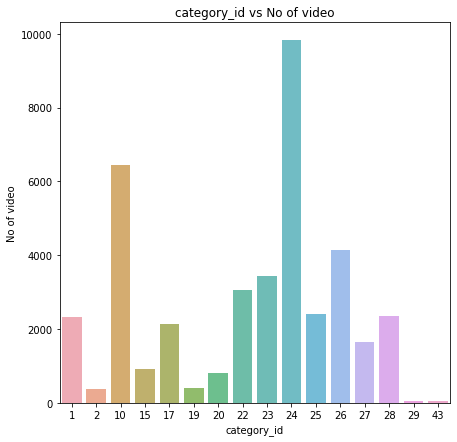

In [ ]:
count=data['category_id'].value_counts()
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('{} vs No of video'.format('category_id'))
plt.ylabel('No of video')
plt.xlabel('{}'.format('category_id'))
plt.show()

Data Preprocessign and Feature Engineering

In [ ]:
#No of tags
tags=[x.count("|")+1 for x in data["tags"]]
data["No_tags"]=tags

In [ ]:
#length of description
desc_len=[len(x) for x in data["description"]]
data["desc_len"]=desc_len

In [ ]:
#length of title
title_len=[len(x) for x in data["title"]]
data["len_title"]=title_len

In [ ]:
publish_time = pd.to_datetime(data['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
data['publish_time'] = publish_time.dt.time
data['publish_date'] = publish_time.dt.date

In [ ]:
#day at which video is publish
data['publish_weekday']=publish_time.dt.day_name()

In [ ]:
trending_date = pd.to_datetime(data['trending_date'],format="%y.%d.%m")

In [ ]:
data['trending_days'] = (trending_date-publish_time).astype('timedelta64[D]')

In [ ]:
data['hours_of_pub'] = (trending_date-publish_time).astype('timedelta64[h]')

In [ ]:
from sklearn import preprocessing

In [ ]:
data['View_logarithm_base2'] = np.log2(data['views']) 

In [ ]:
data['Likes_logarithm_base2'] = np.log2(data['likes']) 

In [ ]:
data['Comment_count_logarithm_base2'] = np.log2(data['comment_count']) 

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#ratio of view/likes  upto 3 decimal
data["Ratio_View_likes"]=round(data["views"]/data["likes"],3)
#ratio of view/dislikes  upto 3 decimal
data["Ratio_View_dislikes"]=round(data["views"]/data["dislikes"],3)
#ratio of view/comment_count  upto 3 decimal
data["Ratio_views_comment_count"]=round(data["views"]/data["comment_count"],3)
#ratio of likes/dislikes  upto 3 decimal
data["Ratio_likes_dislikes"]=round(data["likes"]/data["dislikes"],3)

In [ ]:
print(max(data["Ratio_View_likes"]))
print(max(data["Ratio_View_dislikes"]))
print(max(data["Ratio_views_comment_count"]))
print(max(data["Ratio_likes_dislikes"]))

inf
inf
inf
inf


In [ ]:
#removing the infinite values
data=data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(how='any',axis=0)

In [ ]:
data['publish_weekday'] = data['publish_weekday'].replace({'Monday':1,
                                                             'Tuesday':2,
                                                             'Wednesday':3,
                                                             'Thursday':4,
                                                             'Friday':5,
                                                             'Saturday':6,
                                                             'Sunday':7})

EDA

5    6748
4    6746
2    6572
3    6519
1    5911
7    3530
6    3470
Name: publish_weekday, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


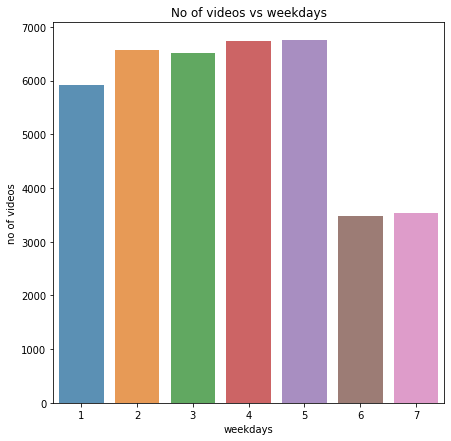

In [ ]:
count=data["publish_weekday"].value_counts()
print(count)
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('No of videos vs weekdays')
plt.ylabel('no of videos')
plt.xlabel('weekdays')
plt.show()

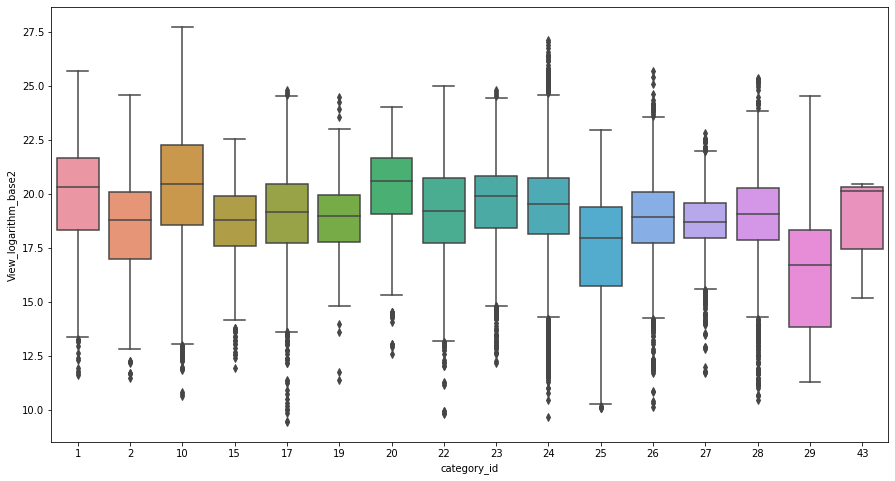

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="category_id", y="View_logarithm_base2", data=data)

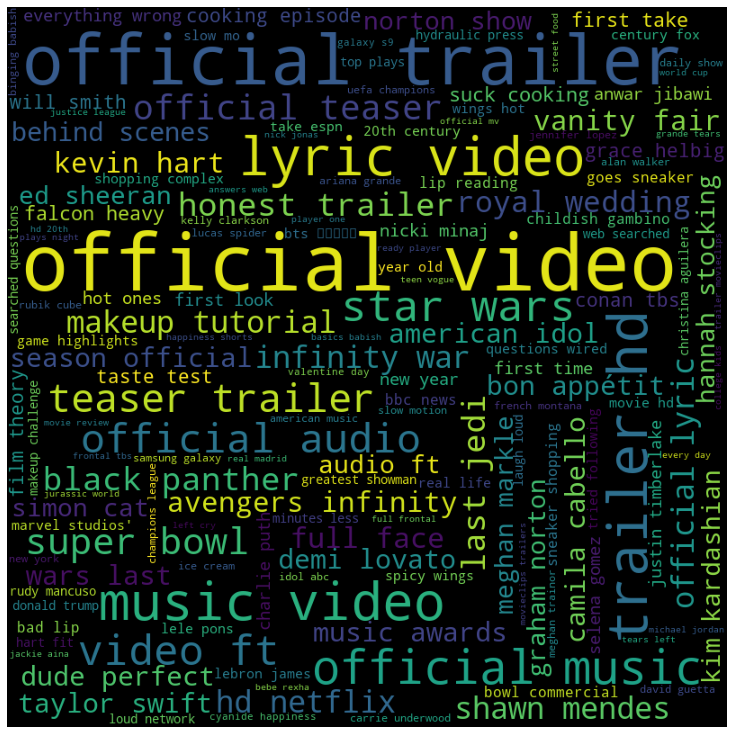

In [ ]:
from wordcloud import WordCloud, STOPWORDS

comment_words = '' 
stopwords = set(STOPWORDS) 

# Iterating through the .csv data file 
for i in data.title: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "

# Creating the Word Cloud
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

# Displaying the WordCloud                    
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

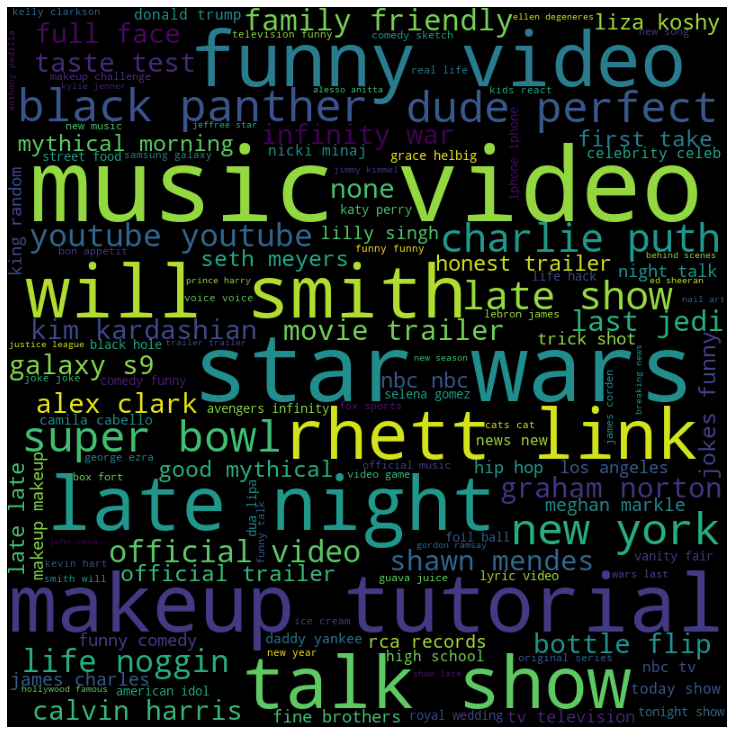

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 

for i in data.tags: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "

# Creating the Word Cloud
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

# Displaying the WordCloud                    
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Text(0.5, 1.0, 'Correlation between features')

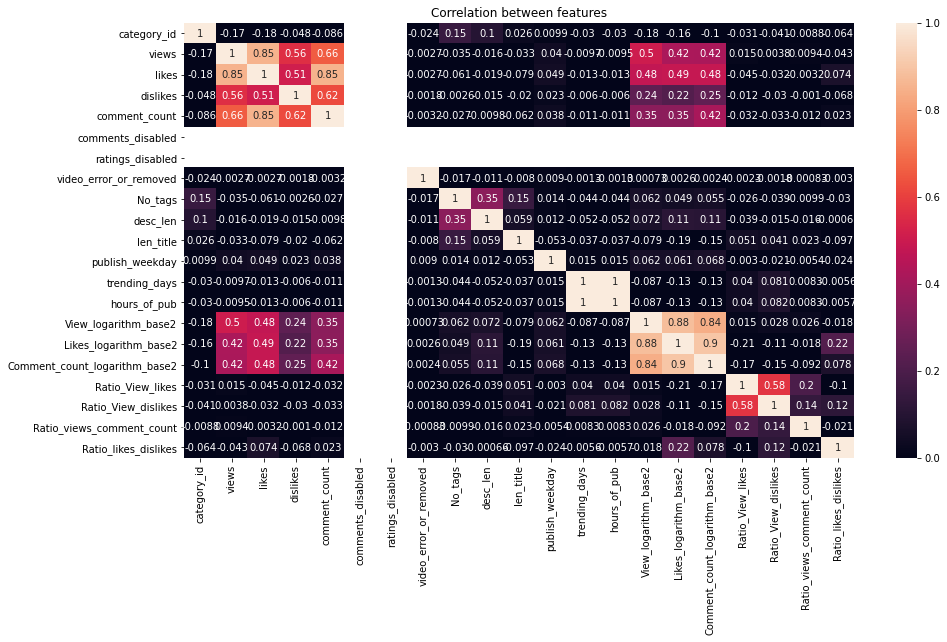

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot = True,fmt='.2g',vmin=0, vmax=1)
plt.title('Correlation between features')

Removing Unwanted Columns

In [ ]:
data.drop(['trending_date','publish_date','publish_time','tags','title','description','channel_title'],axis=1,inplace=True)

In [ ]:
views=data['views']
youtube_view=data.drop(['views'],axis=1,inplace=False)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(youtube_view,views, test_size=0.2,shuffle=False)

In [ ]:
X_train.drop('publish_weekday',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_test.drop('publish_weekday',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Applying Linear Regression

In [ ]:
# REGRESSION ANALYSIS

# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predicting the  test set results
y_pred = model.predict(X_test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(X_test, y_test))
data_11 = {'True Labels': y_test, 'Predicted Labels': y_pred}
new_data1 = pd.DataFrame(data = data_11)
print(new_data1)

Root means score 5792927.193244645
Variance score: 0.80
Result : 0.799473049864078
       True Labels  Predicted Labels
32824       465151      1.078466e+06
32825      1433725      2.937684e+06
32826       204246      2.194447e+05
32827       774092      1.014539e+06
32828      4155055      2.939656e+06
...            ...               ...
40943      8259128      1.446486e+07
40944      1685609      2.030479e+06
40946      1066451      1.259057e+06
40947      5660813      5.942519e+06
40948     10306119      1.552593e+07

[7900 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


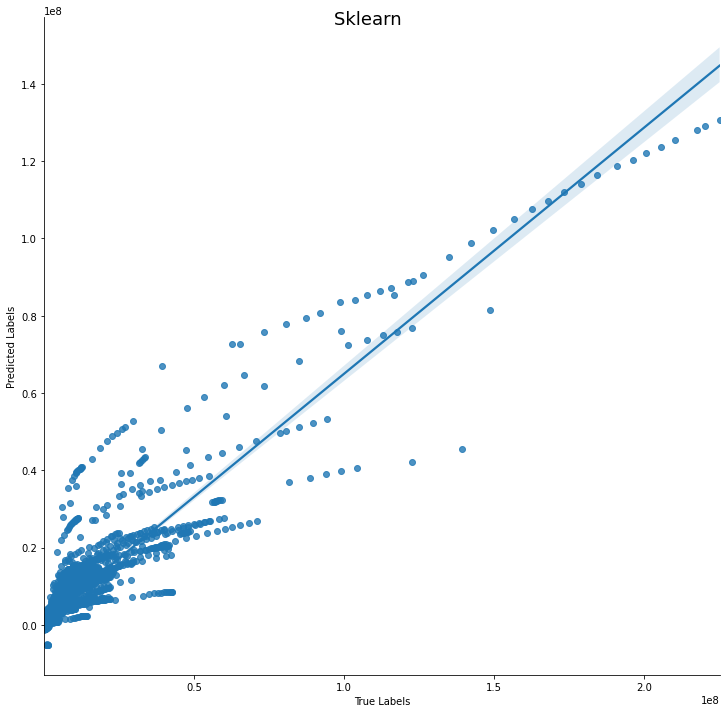

In [ ]:
line_ = sns.lmplot(x="True Labels", y="Predicted Labels", data = new_data1, size = 10)
fig1 = line_.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

Neural Network Architecture

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
def larger_model():
	# create model
  model = Sequential()
  model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
  model.add(Dense(6, kernel_initializer='normal', activation='relu'))
  model.add(Dense(2, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  # Compile model
  model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.losses.MeanAbsoluteError()])
  return model

In [ ]:
m_nn_f = larger_model()
m_nn_f.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 19)                380       
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 120       
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 14        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 3         
Total params: 517
Trainable params: 517
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m_nn_f.fit(np.asarray(X_train).astype(np.float32), np.asarray(y_train).astype(np.float32), batch_size=128, epochs=70)

Epoch 1/70
247/247 [==============================] - 0s 1ms/step - loss: 1703718.3750 - mean_absolute_error: 1703293.2500
Epoch 2/70
247/247 [==============================] - 0s 1ms/step - loss: 1115137.8750 - mean_absolute_error: 1114827.7500
Epoch 3/70
247/247 [==============================] - 0s 1ms/step - loss: 823120.8750 - mean_absolute_error: 822970.7500
Epoch 4/70
247/247 [==============================] - 0s 1ms/step - loss: 818569.6250 - mean_absolute_error: 818797.8750
Epoch 5/70
247/247 [==============================] - 0s 1ms/step - loss: 813606.5000 - mean_absolute_error: 813413.9375
Epoch 6/70
247/247 [==============================] - 0s 1ms/step - loss: 808961.6875 - mean_absolute_error: 808785.2500
Epoch 7/70
247/247 [==============================] - 0s 1ms/step - loss: 805578.5000 - mean_absolute_error: 805579.5000
Epoch 8/70
247/247 [==============================] - 0s 1ms/step - loss: 801261.9375 - mean_absolute_error: 801387.9375
Epoch 9/70
247/247 [========

In [ ]:
predictions = m_nn_f.predict(np.asarray(X_test).astype(np.float32))
predictions

array([[  310566.03],
       [ 2010229.2 ],
       [  311566.12],
       ...,
       [ 1156685.6 ],
       [ 3546172.8 ],
       [22194386.  ]], dtype=float32)

In [ ]:
# print("Result :",m_nn.score(x_t_scaled, y_test))
data_1 = {'True Labels': y_test, 'Predicted Labels': predictions.flatten()}
new_data = pd.DataFrame(data = data_1)
print(new_data)

       True Labels  Predicted Labels
32824       465151      3.105660e+05
32825      1433725      2.010229e+06
32826       204246      3.115661e+05
32827       774092      6.788236e+05
32828      4155055      1.560032e+06
...            ...               ...
40943      8259128      8.858212e+06
40944      1685609      1.408719e+06
40946      1066451      1.156686e+06
40947      5660813      3.546173e+06
40948     10306119      2.219439e+07

[7900 rows x 2 columns]


In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error', (mean_abolute_error(y_test, predictions.flatten())))
print('Variance score: %.2f' % r2_score(y_test, predictions))

Root means score 5078223.287497995
Variance score: 0.85


Applying Random Forest

Hyper-parameter Turning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
n_estimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyper_parameter = [{'n_estimators':n_estimator,'max_depth': depth}]
grid_search = GridSearchCV(RF,hyper_parameter,cv=5,verbose=1,scoring='r2',n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
print("Best HyperParameter: ",grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
scores = grid_search.cv_results_['mean_test_score'].reshape(len(n_estimator),len(depth))
plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(n_estimator)), n_estimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()
maxDepth=grid_search.best_params_['max_depth']
n_estimator=grid_search.best_params_['n_estimators']

 Random Forest using Optimal Hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = n_estimator,max_depth=maxDepth)
model.fit(X_train, y_train)

In [ ]:
# predicting the  test set results
y_pred = model.predict(X_test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(X_test, y_test))
data_1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
new_data = pd.DataFrame(data = data_1)
print(new_data)

In [ ]:
line_plot = sns.lmplot(x="True Labels", y="Predicted Labels", data = new_data, size = 10)
fig1 = line_plot.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)